In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

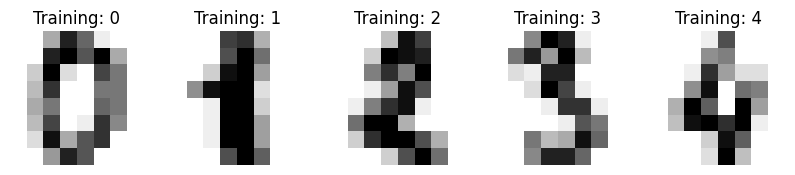

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize= (10,3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

Data processing

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

scaling image data

```
# This is formatted as code
```



In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

train test split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(data, df.target,train_size=0.3)

X_train.shape,X_test.shape,y_train.shape,y_test.shape


((539, 64), (1258, 64), (539,), (1258,))

random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

predict test data

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([0, 9, 5, ..., 0, 0, 3])

model accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[118,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 124,   0,   1,   0,   0,   0,   0,   0,   0],
       [  1,   0, 120,   2,   0,   0,   0,   0,   1,   0],
       [  0,   2,   0, 112,   0,   2,   1,   1,   8,   0],
       [  0,   0,   0,   0, 128,   0,   0,   7,   0,   0],
       [  0,   0,   0,   2,   0, 129,   1,   0,   1,   0],
       [  1,   2,   0,   0,   0,   1, 124,   0,   1,   0],
       [  0,   0,   0,   0,   2,   0,   0, 124,   0,   1],
       [  0,   6,   0,   1,   0,   0,   0,   1, 111,   1],
       [  0,   1,   0,   7,   0,   1,   0,   4,   0, 108]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       118
           1       0.92      0.99      0.95       125
           2       1.00      0.97      0.98       124
           3       0.90      0.89      0.89       126
           4       0.98      0.95      0.97       135
           5       0.97      0.97      0.97       133
           6       0.98      0.96      0.97       129
           7       0.91      0.98      0.94       127
           8       0.91      0.93      0.92       120
           9       0.98      0.89      0.94       121

    accuracy                           0.95      1258
   macro avg       0.95      0.95      0.95      1258
weighted avg       0.95      0.95      0.95      1258

